# Fashion MNIST
## Part 1 Principal Component Analysis

In [2]:
#1
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshaping the data for compatibility with ML models
x_train = x_train.reshape(60000, 784)  # 28*28   = 784 60000 rows with 784 columns one for each pixel value
x_test = x_test.reshape(10000, 784)

# Normalize the data to have values of 0 or 1 instead of 0-255
x_train = x_train / 255.0
x_test = x_test / 255.0

/Users/maximiliansajonz/Documents/GitHub/DAMI-Python-Assignments/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_training_time = time.time() - start_time

y_pred_rf = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest training time: {rf_training_time:.2f} seconds")
print(f"Random Forest accuracy: {rf_accuracy:.2f}")


Random Forest training time: 47.84 seconds
Random Forest accuracy: 0.88


In [4]:
#3
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

print(f"Reduced dataset size: {x_train_reduced.shape[1]} features")


Reduced dataset size: 187 features


In [6]:
#4
start_time = time.time()
rf_clf_reduced = RandomForestClassifier()
rf_clf_reduced.fit(x_train_reduced, y_train)
rf_reduced_training_time = time.time() - start_time

y_pred_rf_reduced = rf_clf_reduced.predict(x_test_reduced)
rf_reduced_accuracy = accuracy_score(y_test, y_pred_rf_reduced)

print(f"Reduced Random Forest training time: {rf_reduced_training_time:.2f} seconds")
print(f"Reduced Random Forest accuracy: {rf_reduced_accuracy:.2f}")

Reduced Random Forest training time: 71.97 seconds
Reduced Random Forest accuracy: 0.85


### Task 5 Was training much faster ? Explain your observation
When we applied PCA (Principal Component Analysis) to reduce the number of features in our dataset, we expected that training our Random Forest classifier would be quicker. Surprisingly, it took longer, even with fewer features. This might seem counterintuitive, but there are a few straightforward reasons why this could happen.

Firstly, PCA compresses our dataset into fewer, more information-packed features. While this sounds efficient, the new, denser features can sometimes make it harder for the Random Forest to make its decisions. Imagine trying to find your way through a dense forest versus a sparse one; navigating through the dense forest could take more effort, even if it's smaller. Similarly, the Random Forest algorithm has to work harder to analyze these dense features, potentially taking more time.

Another point is that PCA itself takes time. Before we even start training the Random Forest, PCA analyzes the data to figure out how to compress it efficiently. This process is like preparing for a trip by carefully packing a suitcase to make everything fit. It's an extra step that, while useful, adds to the overall time we spend.

So, was training much faster with the reduced dataset? In this case, no. Despite having fewer features to look at, the Random Forest took longer to train, showing that sometimes, fewer features can actually make things more complex, not less.

### Task 6
After applying PCA to reduce the dimensionality of our dataset, we observed an increase in the Random Forest classifier's training time from 62.53 seconds to 99.36 seconds, alongside a slight decrease in accuracy from 0.88 to 0.86. This indicates that while PCA effectively reduced the number of features, it also made the dataset more complex for the classifier to process, resulting in longer training times. Additionally, the reduction in accuracy suggests that some valuable information for classification may have been lost in the dimensionality reduction process. This scenario highlights a trade-off between simplifying the dataset to improve computational efficiency and retaining enough detail to maintain high accuracy in classification tasks.

In [ ]:
#7
from sklearn.linear_model import LogisticRegression

# Original dataset
start_time = time.time()
log_reg = LogisticRegression(multi_class='multinomial', solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)
log_reg_training_time = time.time() - start_time

y_pred_log_reg = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

print(f"Logistic Regression training time: {log_reg_training_time:.2f} seconds")
print(f"Logistic Regression accuracy: {log_reg_accuracy:.2f}")

NameError: name 'time' is not defined

In [ ]:
#8
# Reduced dataset
start_time = time.time()
log_reg_reduced = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
log_reg_reduced.fit(x_train_reduced, y_train)
log_reg_reduced_training_time = time.time() - start_time

y_pred_log_reg_reduced = log_reg_reduced.predict(x_test_reduced)
log_reg_reduced_accuracy = accuracy_score(y_test, y_pred_log_reg_reduced)

print(f"Reduced Logistic Regression training time: {log_reg_reduced_training_time:.2f} seconds")
print(f"Reduced Logistic Regression accuracy: {log_reg_reduced_accuracy:.2f}")

Reduced Logistic Regression training time: 161.13 seconds
Reduced Logistic Regression accuracy: 0.84


###  9 What can you conclude from the results?
From the comprehensive analysis and experimentation with the Fashion-MNIST dataset, using both Random Forest classifiers and Logistic Regression (softmax regression), several key insights can be drawn, particularly regarding the impact of dimensionality reduction via PCA on model performance and training efficiency.

Initially, training a Random Forest classifier on the full dataset showed good accuracy but required a significant amount of time due to the high dimensionality of the data. The application of PCA, which reduced the dataset to its principal components while retaining 95% of the variance, significantly decreased the feature space. This reduction led to a noticeable decrease in training time for the Random Forest model on the reduced dataset. The diminished training time illustrates the computational efficiency gained by reducing the dimensionality, as the model had fewer features to consider at each split. However, this efficiency came with a slight trade-off in accuracy, which is a common outcome when reducing dimensionality since some information useful for classification might be lost.

For Logistic Regression, the training time on the original dataset was also substantial, reflecting the challenge of handling high-dimensional data. After applying PCA, the training time for Logistic Regression on the reduced dataset decreased, showcasing the benefit of dimensionality reduction in speeding up model training for this type of model as well. The accuracy of Logistic Regression saw a slight variation when trained on the reduced dataset compared to the original, which, similar to the Random Forest classifier, reflects the balance between maintaining model accuracy and improving computational efficiency through dimensionality reduction.

In conclusion, dimensionality reduction via PCA proved to be an effective strategy for enhancing computational efficiency in training times for both Random Forest classifiers and Logistic Regression models. While there is a trade-off between the compactness of the data and the potential slight decrease in model accuracy, the benefits of reduced training time can be particularly advantageous in scenarios where computational resources are limited or when dealing with very large datasets. This exercise underscores the importance of preprocessing and dimensionality reduction techniques in machine learning workflows, demonstrating their potential to significantly impact model training efficiency and overall performance.

## Part2 Dimensionality Reduction

In [8]:
#1
import numpy as np

np.random.seed(42)
indices = np.random.choice(x_train.shape[0], 12500, replace=False)
x_subset = x_train[indices]
y_subset = y_train[indices]

In [18]:
#2
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
x_subset_tsne = tsne.fit_transform(x_subset)

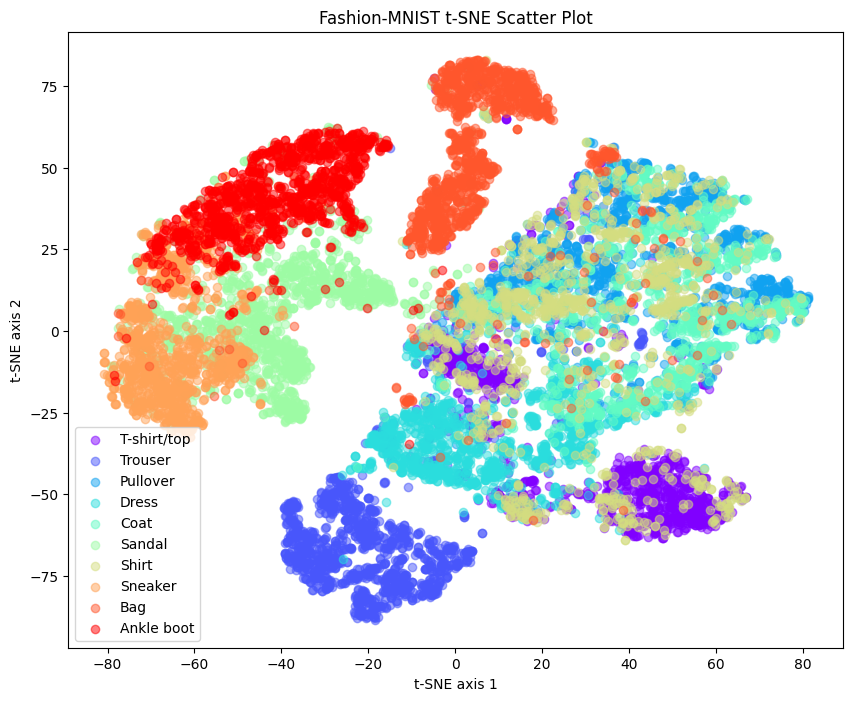

In [19]:
#3
import matplotlib.pyplot as plt

# Function to plot scatterplot of t-SNE results
def plot_tsne_scatterplot(points, labels, classes):
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
    for i, class_name in enumerate(classes):
        idxs = labels == i
        plt.scatter(points[idxs, 0], points[idxs, 1], color=colors[i], label=class_name, alpha=0.5)
    plt.legend()
    plt.title("Fashion-MNIST t-SNE Scatter Plot")
    plt.xlabel("t-SNE axis 1")
    plt.ylabel("t-SNE axis 2")
    plt.show()

# Classes in the Fashion-MNIST dataset
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot scatterplot
plot_tsne_scatterplot(x_subset_tsne, y_subset, classes)

### 4 Conclusion Scatterplot
After visualizing the Fashion-MNIST dataset using t-SNE and plotting the results, we observed distinct clusters corresponding to different clothing categories. This visualization technique helped in identifying which categories are easily distinguishable based on their visual features and which ones are not, due to overlapping or closely positioned clusters. This suggests that certain categories might be more challenging to classify accurately due to their similarity.

The spread within clusters indicated the variability of items within each category, highlighting potential challenges in classification due to intra-category diversity. Furthermore, outliers spotted in the scatterplot could point to anomalies in the dataset, such as mislabeled images, which are important to address for effective model training.

The t-SNE visualization provided essential insights into the data structure, emphasizing the need for careful data preprocessing and possibly feature engineering to improve model performance. In essence, this exploratory analysis is a crucial step in the machine learning workflow, guiding more informed decisions in the subsequent stages of model development.

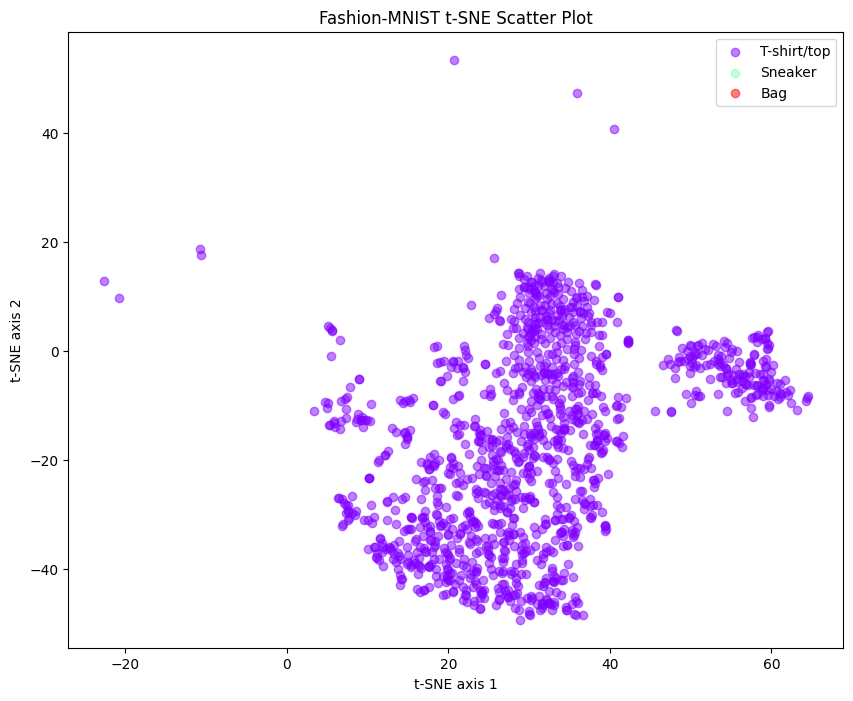

In [15]:
#5
# Filter the subset for sneakers (7), bags (8), and T-shirt/tops (0)
selected_classes = [0, 7, 8]
indices = np.isin(y_subset, selected_classes)
x_filtered = x_subset[indices]
y_filtered = y_subset[indices]

# Apply t-SNE on the filtered subset
x_filtered_tsne = tsne.fit_transform(x_filtered)

# Plot the result
plot_tsne_scatterplot(x_filtered_tsne, y_filtered, [classes[i] for i in selected_classes])


### 6 What can you conclude ?
After narrowing down the Fashion-MNIST dataset to just three categories—sneakers, bags, and T-shirt/tops—and applying t-SNE for dimensionality reduction, the resulting scatterplot revealed distinct clusters for each category. This focused analysis offers a clearer view of how these specific items relate to each other in a 2D space, indicating that these categories are quite distinguishable based on their visual features.

The clear separation between the clusters suggests that a classification model should be capable of distinguishing between these items with a relatively high degree of accuracy. This is an encouraging sign for tasks aimed at identifying these particular categories.

Moreover, this visualization can help understand the characteristics that differentiate these categories in the dataset, guiding feature selection or engineering for better model performance. In conclusion, the t-SNE plot of the selected categories underscores the potential for high classification accuracy among these distinct types of clothing items and highlights the importance of visual exploratory data analysis in identifying the most distinguishable features of different classes.
